<a href="https://colab.research.google.com/github/raju-sharma/IPML_Project/blob/main/CNN_Cataract_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os
# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/dataset'

# Set the train-test split ratio
test_size = 0.20

# Get the list of normal and abnormal image file paths
normal_images = [os.path.join(dataset_path, '1_normal', img) for img in os.listdir(os.path.join(dataset_path, '1_normal'))]
abnormal_images = [os.path.join(dataset_path, '2_cataract', img) for img in os.listdir(os.path.join(dataset_path, '2_cataract'))]

# Create the labels for each image
normal_labels = [0] * len(normal_images)    
abnormal_labels = [1] * len(abnormal_images)

# Concatenate the images and labels
images = normal_images + abnormal_images
labels = normal_labels + abnormal_labels

In [88]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [89]:
model = Sequential()

model.add(Conv2D(2,kernel_size=(3,3), padding='same', activation='relu', input_shape=(512,512,3)))
model.add(Conv2D(2,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(4,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(4,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(8, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(16, kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 512, 512, 2)       56        
                                                                 
 conv2d_66 (Conv2D)          (None, 512, 512, 2)       38        
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 256, 256, 2)      0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 256, 256, 4)       76        
                                                                 
 conv2d_68 (Conv2D)          (None, 256, 256, 4)       148       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 128, 128, 4)      0         
 g2D)                                                 

In [91]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=13)
# Check the number of images in each set
print('Number of train images:', len(train_images))
print('Number of test images:', len(test_images))

Number of train images: 320
Number of test images: 80


In [93]:
import cv2
from PIL import Image
X_train = []
for file_path in train_images:
        img_array=cv2.imread(os.path.join(file_path))
        img_array=cv2.resize(img_array,(512,512))
        X_train.append(img_array)
print(X_train[0].shape)

(512, 512, 3)


In [94]:
X_test = []
for file_path in test_images:
        img_array=cv2.imread(os.path.join(file_path))
        img_array=cv2.resize(img_array,(512,512))
        X_test.append(img_array)
print(X_test[0].shape)

(512, 512, 3)


In [95]:
import numpy as np
y_train = np.array(train_labels)
y_train = y_train.reshape(len(y_train),1)
y_test = np.array(test_labels)
y_test = y_test.reshape(len(y_test),1)
y_test.shape

(80, 1)

In [96]:
X_train = np.array(X_train)
X_train = X_train/255.0
X_test = np.array(X_test)
X_test = X_test/255.0
X_test.shape

(80, 512, 512, 3)

In [97]:
X_train.shape

(320, 512, 512, 3)

In [98]:
y_train.shape

(320, 1)

In [99]:
model.fit(X_train,y_train,epochs =10)

Epoch 1/10
10/10 [==============================] - 7s 109ms/step - loss: 0.6768 - accuracy: 0.6844
Epoch 2/10
10/10 [==============================] - 1s 102ms/step - loss: 0.5826 - accuracy: 0.7437
Epoch 3/10
10/10 [==============================] - 1s 99ms/step - loss: 0.5876 - accuracy: 0.7437
Epoch 4/10
10/10 [==============================] - 1s 97ms/step - loss: 0.5811 - accuracy: 0.7437
Epoch 5/10
10/10 [==============================] - 1s 100ms/step - loss: 0.5730 - accuracy: 0.7437
Epoch 6/10
10/10 [==============================] - 1s 98ms/step - loss: 0.5714 - accuracy: 0.7437
Epoch 7/10
10/10 [==============================] - 1s 98ms/step - loss: 0.5733 - accuracy: 0.7437
Epoch 8/10
10/10 [==============================] - 1s 99ms/step - loss: 0.5731 - accuracy: 0.7437
Epoch 9/10
10/10 [==============================] - 1s 97ms/step - loss: 0.5710 - accuracy: 0.7437
Epoch 10/10
10/10 [==============================] - 1s 97ms/step - loss: 0.5707 - accuracy: 0.7437


In [100]:
y_predict = model.predict(X_test)
y_predict = y_predict.argmax(axis=-1)

3/3 [==============================] - 1s 412ms/step


In [101]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_predict,y_test))

Accuracy on unknown data is 0.775


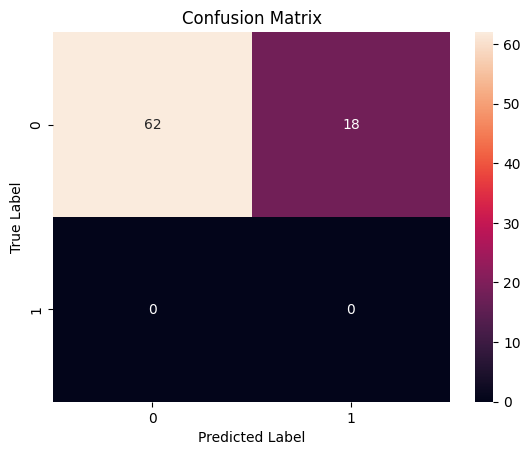

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_predict,y_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()